**Prerequisites**


Make sure to set Hardware accelerator as T4GPU

(This can be done by setting runtype change in Google Colab)

In [ ]:
!pip install diffusers==0.10.2 transformers scipy ftfy accelerate
from diffusers import StableDiffusionPipeline
import nltk
from nltk.chat.util import Chat, reflections
from IPython.display import display
nltk.download('punkt')
pipe = StableDiffusionPipeline.from_pretrained("runwayml/stable-diffusion-v1-5")
pipe.to("cuda")

Chatbot: Hello!
Chatbot: what's your name?
You: karthik
Chatbot: Nice to meet you, karthik! How old are you?
You: 25
Chatbot: Got it! What's your gender?
You: male
Chatbot: Thank you! Where are you located?
You: bengaluru
Chatbot: Pick any of the style to genarate outfit.
Formal
Diwali
Onam
Navaratri
Ramzan
KarvaChauth
Holi
Children
You: formal


  0%|          | 0/50 [00:00<?, ?it/s]

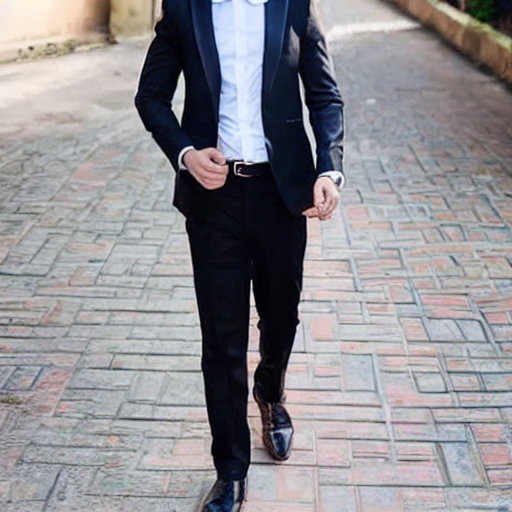

In [ ]:
patterns = [
    (r'hi|hello|hey', ['Hello!', 'Hi there!', 'Hey!']),
    (r'how are you|how\'s it going', ['I\'m just a chatbot, but I\'m doing fine. How can I assist you?']),
    (r'bye|goodbye', ['Goodbye!', 'Have a great day!', 'See you later!']),
    (r'my name is (.*)', ['Hi %1! How can I help you today?']),
    (r'(.*) (weather|temperature)', ['I\'m not equipped to check the weather, sorry.']),
    (r'(.*) (buy|purchase) (.*)', ['Sure, I can help you with that. What specific item are you looking to buy?']),
    (r'(.*) (looking for|searching for) (.*)', ['Of course! What type of %3 are you searching for?']),
    (r'(.*) (recommend|suggest) (.*)(clothing|outfit)', ['Certainly! What occasion is the outfit for?']),
    (r'(.*) (add|remove) (.*) to (cart|shopping cart)', ['Sure, I\'ve added %3 to your shopping cart.', 'I\'ve removed %3 from your shopping cart.']),
    (r'(.*) (name|call) (.*)', ['Nice to meet you, %3!', 'Hello, %3!']),
    (r'(.*) (age|old) (.*)', ['I see! How can I assist you with shopping today, %1?']),
    (r'(.*) (gender|sex) (.*)', ['Great! What are you looking to shop for, %1?']),
    (r'(.*) (region|location) (.*)', ['Got it! How can I assist you with shopping in %3, %1?'])
]


chatbot = Chat(patterns, reflections)


user_info = {}
print("Chatbot: Hello!")

print("Chatbot: what's your name?")
user_info['name'] = input("You: ")

print("Chatbot: Nice to meet you, {}! How old are you?".format(user_info['name']))
user_info['age'] = int(input("You: "))

print("Chatbot: Got it! What's your gender?")
user_info['gender'] = input("You: ")

print("Chatbot: Thank you! Where are you located?")
user_info['region'] = input("You: ")

print("Chatbot: Pick any of the style to genarate outfit.\nFormal\nDiwali\nOnam\nNavaratri\nRamzan\nKarvaChauth\nHoli\nChildren")
user_input = input("You: ")
if user_input.lower() == 'exit':
    print("Chatbot: Goodbye!")

prompt = f"{user_input} outfit  for a {user_info['age']} year old {user_info['gender']} in {user_info['region']}"
image = pipe(prompt).images[0]
image



Chatbot: Are you satisfied with the outfit?
Type 'yes' for satisfied or type 'no' if you are not satisfied.
You: yes
Chatbot: Do you want to try accessories that match the outfit?
You: yes
Chatbot: Type the accessories you want to try from the given list.
Earrings
Handbag
Wallet
Jewelry
You: handbag


  0%|          | 0/50 [00:00<?, ?it/s]

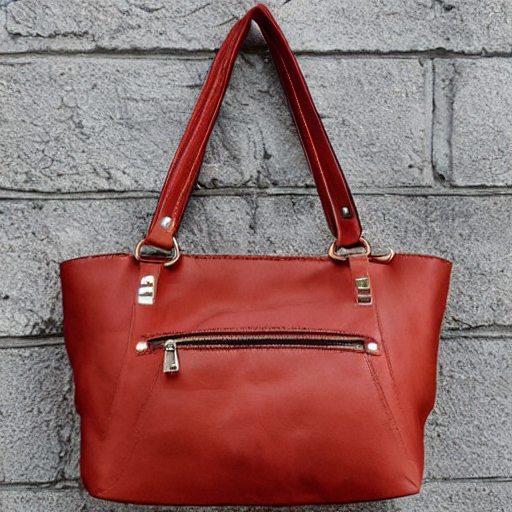

In [ ]:
print("Chatbot: Are you satisfied with the outfit?\nType 'yes' for satisfied or type 'no' if you are not satisfied.")
response = input("You: ")
if response.lower() in ['no', 'n']:
    print("Chatbot: Sorry for not meeting your expectations.")
else:
    print("Chatbot: Do you want to try accessories that match the outfit?")
    accessories = input("You: ")
    if accessories.lower() in ['no', 'n']:
        print("Chatbot: Goodbye! If you have more questions in the future, feel free to ask. Have a great day!")
    else:
        print("Chatbot: Type the accessories you want to try from the given list.\nEarrings\nHandbag\nWallet\nJewelry")
        chosen_accessory = input("You: ")
        accessory_prompt = f"{chosen_accessory} for a {user_info['gender']} in {user_info['region']}"
        accessory_image = pipe(accessory_prompt).images[0]
        display(accessory_image)